<a href="https://colab.research.google.com/github/ReemAlsharabi/KAUST-Academy/blob/main/summer-program/week5/CV/Day1/Day1_ComputerVision_parts_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day1: Regression and Classification

<button disabled>

**Author:** [Modar Alfadly](http://modar.me) and [Hasan Abed Al Kader Hammoud](https://scholar.google.com/citations?user=Plf1JSIAAAAJ&hl=en)

</button>

To setup a conda environment for this project, just run the following commands:

```shell
conda create -n cs323 python=3.9.1 -y
conda activate cs323

conda install pytorch torchvision torchaudio cudatoolkit=11.0 -c pytorch -c conda-forge -y  # install PyTorch 1.7.1
conda install jupyter -y  # to edit this file
conda install jedi=0.17.2 -y  # https://github.com/ipython/ipython/issues/12740
conda install matplotlib -y  # for plotting
conda install requests -y  # to download Google Drive files

pip install jupyter_http_over_ws  # for Google Colab
jupyter serverextension enable --py jupyter_http_over_ws  # Google Colab
```

## Remarks


Welcome to day 1 in the computer vision week, this is your first assignment where you will learn/review the basics of PyTorch and some Deep Learning techniques.

# Part 1: Regression (3 points)

## Task 1: gradient descent (1 point)

One of the benefits of using PyTorch is the [automatic differentiation](https://medium.com/@ODSC/automatic-differentiation-in-pytorch-6131b4581cdf) feature. Suppose, that you want to compute the derivative of a composite function with respect to one of its inputs. As long as you can construct the function in PyTorch's basic operations, you can ask it to compute any gradient for you very efficiently.

Let's take this function as an example:
$$f(x) = \frac{\arctan\left(x^{3}\right)}{x}$$



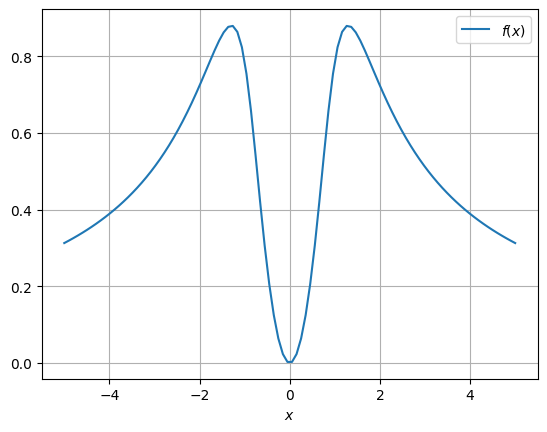

In [60]:
import torch

from matplotlib import pyplot as plt


def f(x):
    return torch.arctan(x**3) / x


xs = torch.linspace(start=-5, end=5, steps=100)
ys = f(xs)

plt.plot(xs, ys, label='$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.grid()
plt.show()

We can rewrite it as a composition of functions (forward-pass).
$$f(x) = g(h(k(x)), x) ~\text{where}~ k(x) = x^3, h(x) = \arctan\left(x\right), g(x, y) = \frac{x}{y}$$

Now we can find its derivative by leveraging the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) (backward-pass).
$$\frac{d f(x)}{dx} = \frac{3x}{x^6 + 1} - \frac{\arctan\left(x^{3}\right)}{x^2}$$

PyTorch implements the [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) algorithm which repeatedly applys the chain rule to automatically compute gradients at a given point. Internally, it dynamically represents the function as a graph where the nodes are the tensors and the edges are the operations that are done to them. Since it knows the partial derivatives of each operation to its inputs (e.g. $g$, $h$, and $k$), propagating the output gradients becomes a mechanical task.

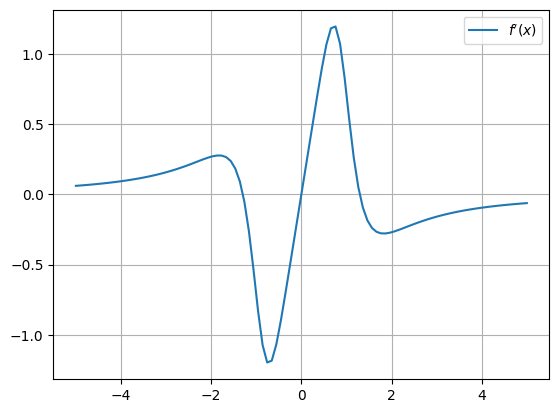

In [61]:
xs = torch.linspace(-5, 5, steps=100, requires_grad=True)
ys = f(xs)

# TODO: understand this line.
# read the docs Tensor.backward: https://pytorch.org/docs/stable/tensors.html
ys.backward(torch.ones_like(ys))

plt.plot(xs.data, xs.grad, label='$f\'(x)$')
plt.legend()
plt.grid()
plt.show()

We need the ability to compute gradients to apply the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) algorithm which is the most fundamental optimization tool for machine learning.

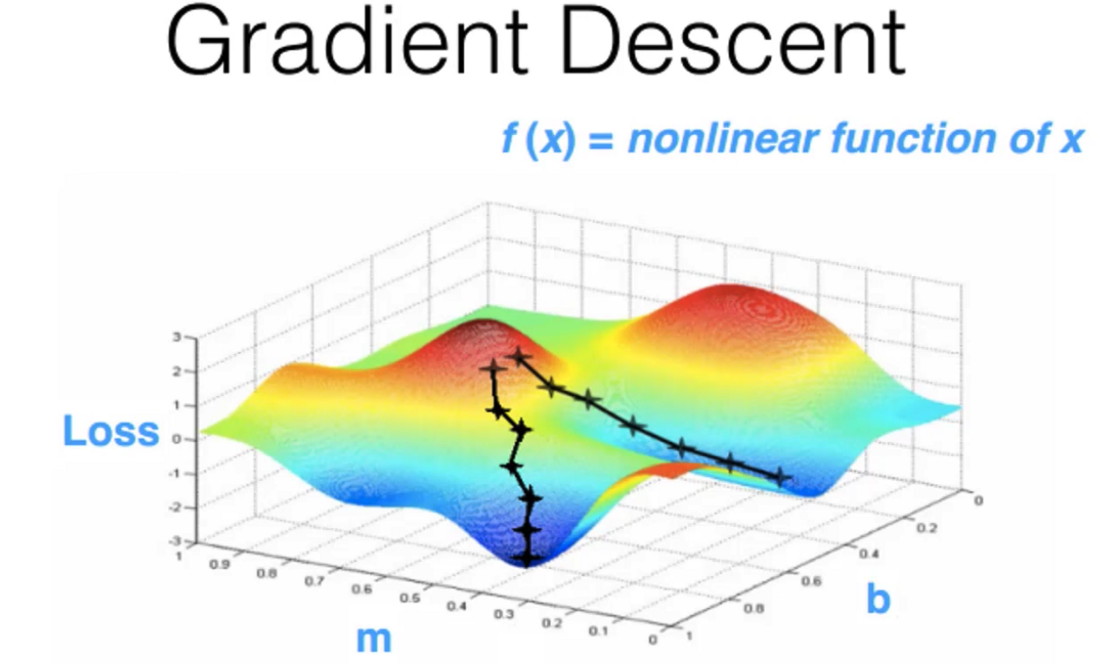

Let's start with a slightly modified function where the goal is to find a local minimum point using gradient descent.
$$f(x) =\text{sign}(x) \frac{\arctan\left(x^{3}\right)}{x}$$

Of course, we can find the minimizer of this functoin by checking where the gradient is zero. However, this is just an example with a single variable. In a real scenario, we don't have an analytical closed form solution for the gradient and the function could have millions and maybe billions of parameters.

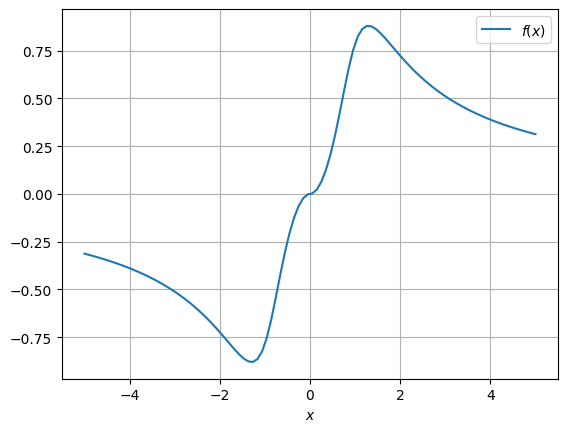

In [62]:
def f(x):
    return torch.sign(x) * torch.arctan(x**3) / x


# TODO: vvvvvvvvvvv
# plot the function f(x) as before
xs = torch.linspace(start=-5, end=5, steps=100)
ys = f(xs)

plt.plot(xs, ys, label='$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.grid()
plt.show()
# ^^^^^^^^^^^^^^^^^

In [63]:
# TODO: understand this line.
def gradient_descent(initial_point, step_size, num_iterations):
    losses = []
    if not torch.is_tensor(initial_point):
        initial_point = torch.full((), initial_point, dtype=torch.float)
    x = initial_point.data.clone().requires_grad_(True)
    for i in range(num_iterations):
        loss = f(x)  # compute the objective (forward-pass)

        x.grad = None  # zero out the gradient
        loss.backward()  # compute the gradient (backward-pass)
        x.data = x.data - step_size * x.grad  # take one step

        losses.append(loss.item())
    return x.detach(), losses

Let's now use this method to find the minimum value of our function using different initializations and hyper-parametrs (e.g., learning rate, number of iterations).

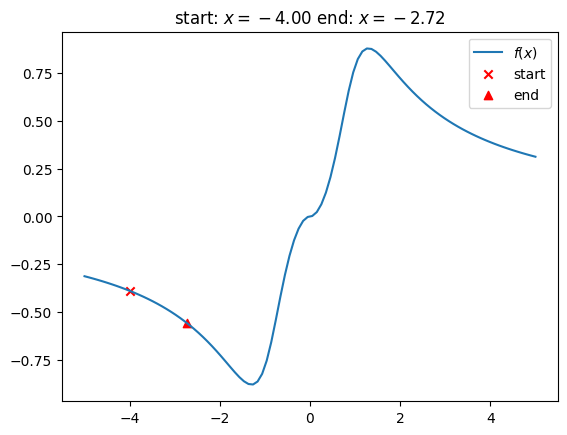

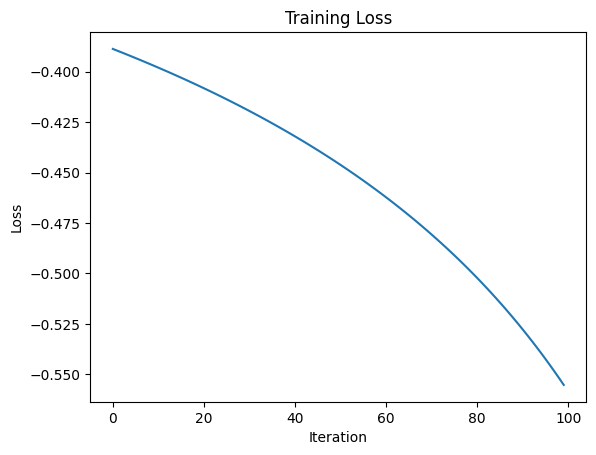

###########################


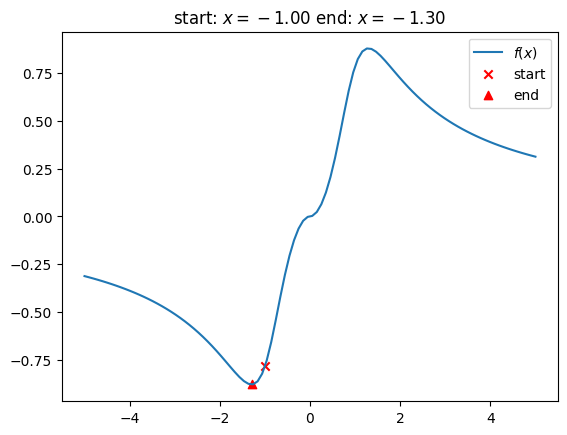

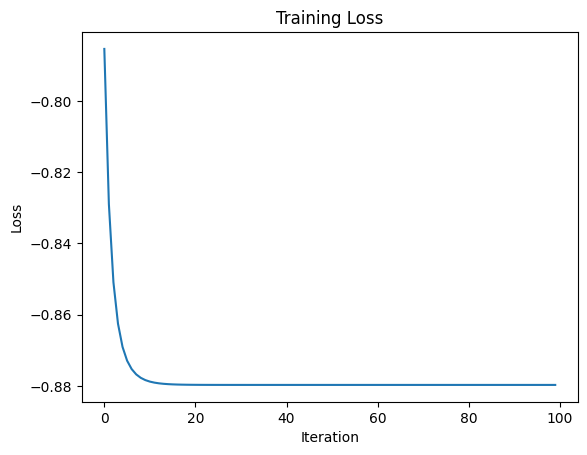

###########################


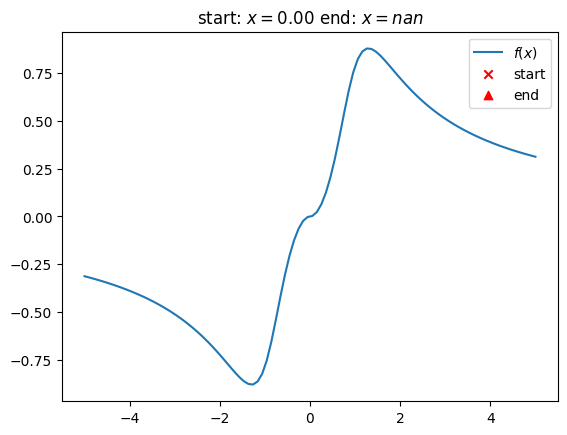

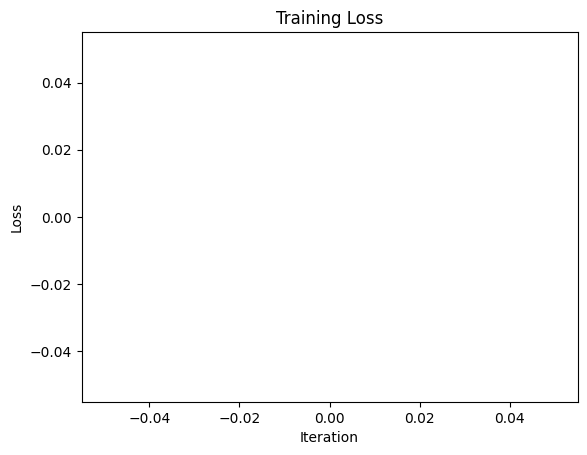

###########################


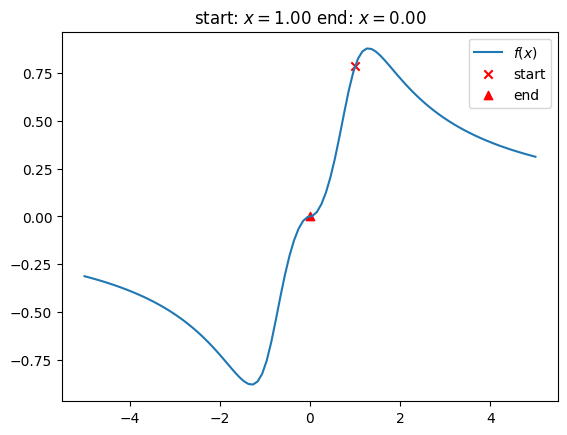

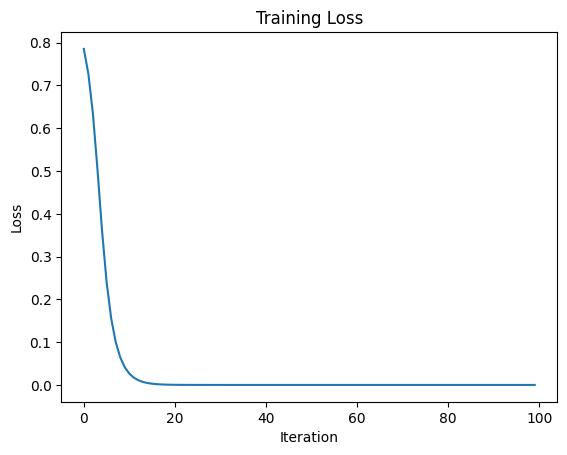

###########################


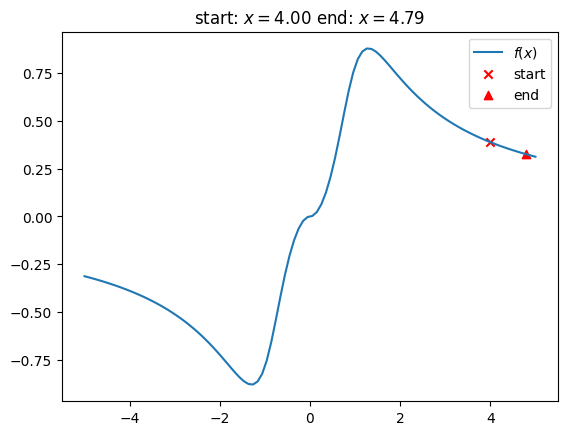

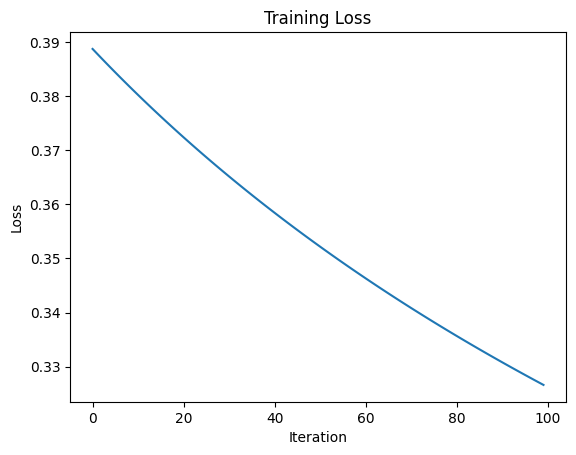

###########################


In [64]:
# TODO: how does the initialization changes the result
# TODO: how should we choose the learning rate and the iterations
# TODO: what happens when we initialize at 0
steps = 100
learning_rate = 0.1
for x_0 in [-4, -1, 0, 1, 4]:
    x_n, losses = gradient_descent(
        initial_point=x_0,
        step_size=learning_rate,
        num_iterations=steps,
    )

    # plot the results
    xs = torch.linspace(-5, 5, steps=100)
    plt.plot(xs, f(xs), label='$f(x)$')
    plt.scatter([x_0], [losses[0]], color='red', marker='x', label='start')
    plt.scatter([x_n], [losses[-1]], color='red', marker='^', label='end')
    plt.title(f'start: $x={x_0:.2f}$ end: $x={x_n:.2f}$')
    plt.legend()
    plt.show()

    # TODO: vvvvvvvvvvv
    # plot the training loss [x-axis:iteration, y-axis:loss_value]
    plt.plot(losses)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()
    # ^^^^^^^^^^^^^^^^^
    print('###########################')

## Task 2: `torch.nn.Module`, `torch.optim.Optimizer`, and `torch.utils.data` (2 points)

PyTorch has many variants of gradient descent optimizers like gradient descent with Nesterov momentum and Adam. You can learn more about them in the [documentation](https://pytorch.org/docs/stable/optim.html) or in this [blog post](https://ruder.io/optimizing-gradient-descent/). They all inherent from the base [`torch.optim.Optimizer`](https://pytorch.org/docs/stable/optim.html#torch.optim.Optimizer) class. We want to change the code above to conform to the conventional PyTorch pipeline.

However, as we mentioned before, in real scenarios, the functions that we try to minimize are more complicated. They are parametric models with the following form $y \approx f(x; \theta)$, where $x$ contains the independent input variables (features), $\theta$ contains the parameters that we need to learn, and $y$ contains the dependent output variables. [Regression](https://en.wikipedia.org/wiki/Regression_analysis) is a perfect example of such problem, where we want to fit a parametric function (model) to some given data (training). The data are given to us as a finite set of $(x, y)$ pairs. For a chosen analytical form of $f(x; \theta)$ (e.g. linear $f(x; \theta) = m x + b$ where $\theta = \{m, b\}$), we want to find the best value of $\theta$ that makes $f(x; \theta)$ as close as possible to $y$ according to some criterion ([loss function](https://en.wikipedia.org/wiki/Loss_function) such as the mean squared error $\left(f(x; \theta) - y\right)^2$). Since we have limited data, we usually train for multiple episodes (epochs); every epoch is one full run over the entire training dataset. Finally, each epoch can be done in a single iteration (standard gradient descent) or multiple iterations (the data could be batched or each iteration will train only on a single input-ouput pair). See [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

In the previous task (Part1.Task1), we didn't have input features $x$ or output variables $y$ (no data). In fact, our old input $x$ is what we refer to here as the parameter $\theta$. So, let's add those edits to our gradient_descent function.

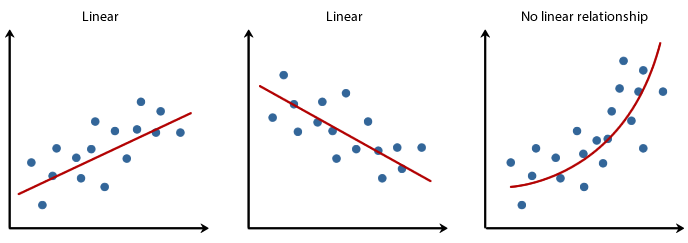

In [65]:
# TODO: understand every line of the following method
def gradient_descent(model, learning_rate, num_epochs, data_loader, criterion):
    losses = []
    optimizer = torch.optim.SGD(model.parameters(), learning_rate)
    for epoch in range(num_epochs):  # one epoch
        for inputs, outputs in data_loader:  # one iteration
            loss = criterion(model(inputs), outputs)  # forward-pass

            optimizer.zero_grad()  # zero out the gradients
            loss.backward()  # compute the gradients (backward-pass)
            optimizer.step()  # take one step

            losses.append(loss.item())
        loss = sum(losses[-len(data_loader):]) / len(data_loader)
        print(f'Epoch #{epoch}: Loss={loss:.3e}')
    return losses

Let's solve the following regression problem. Find the closest third-degree polynomial to $f(x) = x^6 - 3x^5 - x^3 + 3x$ in the range $[-2, 2]$.

In [66]:
import torch.nn as nn

# TODO: understand the Models here (PolynomialModel, Linearmodel, init, nn.Parameter, forward pass ...)
class PolynomialModel(nn.Module):
    """Generic model for a polynomial of any degree."""
    def __init__(self, degree):
        super().__init__()
        assert int(degree) == degree and degree >= 0  # sanity check

        # define the model parameters (order-decreasing)
        # all sub_modules and parameters must be direct attributes of self
        self.coefficients = nn.Parameter(torch.ones([degree + 1]))

    def forward(self, x):
        coefficients = iter(self.coefficients)
        out = torch.zeros_like(x)
        out += next(coefficients, 0)
        for c in coefficients:
            out *= x
            out += c
        return out


class Linearmodel(PolynomialModel):
    """Scalar linear model `f(x) = m x + b`."""
    def __init__(self):
        super().__init__(degree=1)

Let's generate the training dataset. We will first define the ground-truth model and freeze its parameters. Then, use it to generate point pairs in the range $[-2, 2]$.

In [67]:
from torch.utils.data import TensorDataset, DataLoader


f = PolynomialModel(degree=6)
f.coefficients.requires_grad_(False)
f.coefficients.data = torch.FloatTensor([1, -3, 0, -1, 0, 3, 0])

torch.manual_seed(0)
xs = 2 * (torch.rand(1000) * 2  - 1)
dataset = TensorDataset(xs, f(xs))

In [68]:
# TODO: study the following parameters of the data loader
# https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader
# the goal of the data loader is to batch multiple samples "(x, y) pairs"
# on the fly and make them ready for training by using multiprocessing
# it is important to differentiate between Dataset() and DataLoader()
data_loader = DataLoader(
    dataset,
    batch_size=20,
    shuffle=True,
    num_workers=1,
    drop_last=True,
    pin_memory=False,
    collate_fn=None,
)

Epoch #0: Loss=7.403e+02
Epoch #1: Loss=2.728e+02
Epoch #2: Loss=1.930e+02
Epoch #3: Loss=1.688e+02
Epoch #4: Loss=1.568e+02
Epoch #5: Loss=1.494e+02
Epoch #6: Loss=1.439e+02
Epoch #7: Loss=1.394e+02
Epoch #8: Loss=1.354e+02
Epoch #9: Loss=1.316e+02
Average loss for last epoch: 131.6020622253418


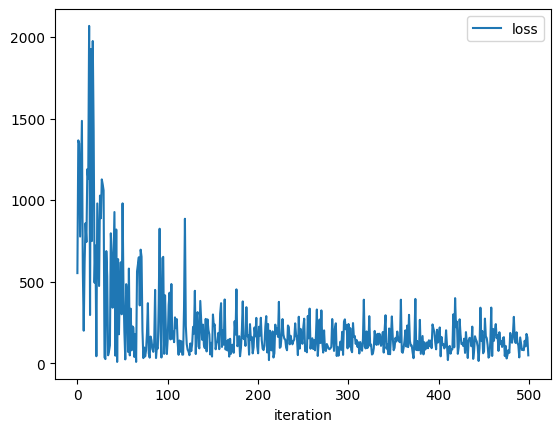

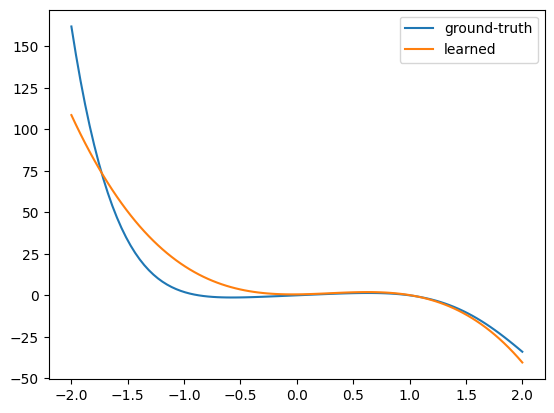

RMSE: 11.58


In [69]:
# TODO: vvvvvvvvvvv
# understand and change the following
# you must achieve a mean squared error of at most 61
# Ans.: RMSE: 11.58

torch.manual_seed(0)
model = PolynomialModel(degree=3)
losses = gradient_descent(
    model,
    learning_rate=0.001,
    num_epochs=10,
    data_loader=data_loader,
    criterion=nn.MSELoss(),
)
# ^^^^^^^^^^^^^^^^^

loss = sum(losses[-len(data_loader):]) / len(data_loader)
print(f'Average loss for last epoch: {loss}')

# plot the training loss
plt.plot(range(len(losses)), losses, label='loss')
plt.xlabel('iteration')
plt.legend()
plt.show()

# plot the ground-truth model vs the learned model
xs = torch.linspace(-2, 2, steps=100)
plt.plot(xs, f(xs), label='ground-truth')
plt.plot(xs, model(xs).data, label='learned')
plt.legend()
plt.show()

# calculate RMSE
from sklearn.metrics import mean_squared_error
with torch.no_grad():
    y_true = f(xs).numpy()
    y_pred = model(xs).data.numpy()
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f'RMSE: {rmse:.2f}')

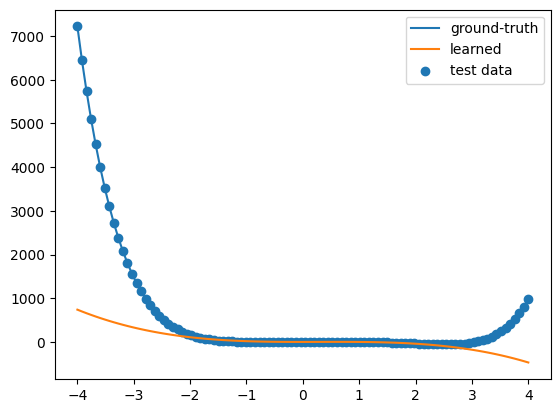

In [70]:
# TODO: vvvvvvvvvvv
# create a testing set in the range [-4, 4] and its data loader
# create a testing set in the range [-4, 4] and its data loader
test_set = [(x, f(x)) for x in torch.linspace(-4, 4, 100)]
test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set))
# ^^^^^^^^^^^^^^^^^

# TODO: vvvvvvvvvvv
# plot the ground-truth model vs the learned model in the new range
xs = torch.linspace(-4, 4, steps=100)
plt.plot(xs, f(xs), label='ground-truth')
plt.plot(xs, model(xs).data, label='learned')
plt.scatter([x for x, _ in test_set], [y for _, y in test_set], label='test data')
plt.legend()
plt.show()
# ^^^^^^^^^^^^^^^^^

# TODO: what is overfitting https://wikipedia.org/wiki/Overfitting

Let's try a different model to fit this sixth-degree polynomial. We will use a plain feed-forwad artificial neural network (a.k.a., fully-connected network and multi-layer perceptron). The model simply a composition of linear layers (actually affine) followed by non-linear functions ([activation functions](https://en.wikipedia.org/wiki/Activation_function); [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) is the most commonly used one). The dimension sizes between layers could increase or decrease as long as the input and output dimensions are consistent with the data (in this case, 1D input and 1D output). The number of layers is referred to as the **depth** of the network (hence, the term deep learning) and the dimension size is the **width**. We will not concern ourselves in this exercise with splitting the data into training and testing. We will leave this for the next parts.

Epoch #0: Loss=1.011e+03
Epoch #1: Loss=6.926e+02
Epoch #2: Loss=1.082e+03
Epoch #3: Loss=6.508e+02
Epoch #4: Loss=3.026e+02
Epoch #5: Loss=2.437e+02
Epoch #6: Loss=1.741e+02
Epoch #7: Loss=3.261e+02
Epoch #8: Loss=1.553e+02
Epoch #9: Loss=1.860e+02
Average loss for last epoch: 186.04375308990478


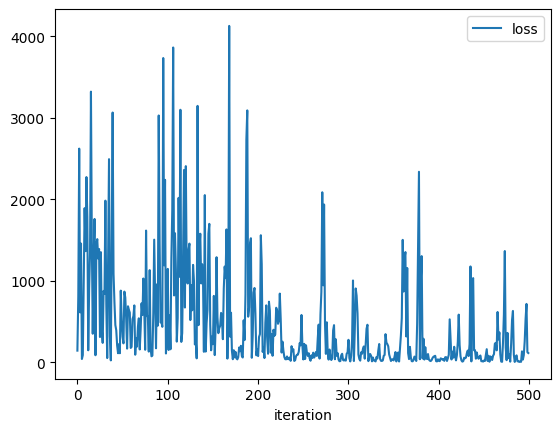

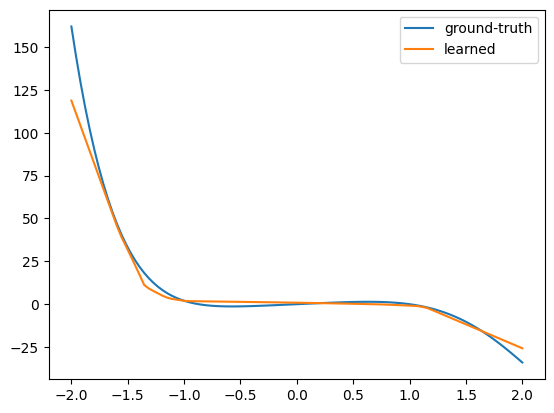

RMSE: 6.93


In [71]:
# TODO: vvvvvvvvvvv
# this is a two hidden-layer fully-connected neural network
# try to change the model configuration and the hyper-parameters
# to get a mean squared error of at most 10
# Ans.: RMSE: 6.93
torch.manual_seed(0)
model = nn.Sequential(
    # TODO: what is the total number of parameters?
    # Ans. before changing the arch.: (1*3) + 3 (bias) + (3*5) + 5 (bias) + (5*1) + 1 (bias) = 32
    # nn.Linear(in_features=1, out_features=3),
    # nn.ReLU(inplace=True),
    # nn.Linear(in_features=3, out_features=5),
    # nn.ReLU(inplace=True),
    # nn.Linear(in_features=5, out_features=1),

    nn.Linear(in_features=1, out_features=64),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=64, out_features=32),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=32, out_features=16),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=16, out_features=1),
)

xs = 2 * (torch.rand(1000, 1) * 2  - 1)
dataset = TensorDataset(xs, f(xs))

data_loader = DataLoader(
    dataset,
    batch_size=20,
    shuffle=True,
    num_workers=1,
    drop_last=True,
    pin_memory=False,
    collate_fn=None,
)
losses = gradient_descent(
    model=model,
    learning_rate=0.001,
    num_epochs=10,
    data_loader=data_loader,
    criterion=nn.MSELoss(),
)
# ^^^^^^^^^^^^^^^^^

loss = sum(losses[-len(data_loader):]) / len(data_loader)
print(f'Average loss for last epoch: {loss}')

# plot the training loss
plt.plot(range(len(losses)), losses, label='loss')
plt.xlabel('iteration')
plt.legend()
plt.show()

# plot the ground-truth model vs the learned model
xs = torch.linspace(-2, 2, steps=100).unsqueeze(1)
plt.plot(xs, f(xs), label='ground-truth')
plt.plot(xs, model(xs).data, label='learned')
plt.legend()
plt.show()

# calculate RMSE
from sklearn.metrics import mean_squared_error
with torch.no_grad():
    y_true = f(xs).numpy()
    y_pred = model(xs).data.numpy()
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f'RMSE: {rmse:.2f}')

# Part 2: Image Classification (5 points)

## Task 1: Logistic Regression (1.5 points)

It is now time to move on from regression to classification; the problem of assigning class labels to data points (input features). The simplest form of classification is binary classification, where each input can only be assigned one of two classes. For example, given an N-D point $\mathbf{x}$, it has class label 0 if it is inside the N-D $\ell_2$ unit sphere (i.e., $\|\mathbf{x}\|_2 < 1$ and class label 1 otherwise. Or given an image, we assign it class 1 if it contains a cat and class 0 if it doesn't. One of the basic statistical models for this task is [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression). It was named as such because of the use of the [logistic function](https://en.wikipedia.org/wiki/Logistic_function) (a.k.a, sigmoid) as the last activation function. Sigmoid is a squashing function where the output range is limited in the range $[0, 1]$. So, this is why it is a perfect solution for binary classification. The output of a trained model with the sigmoid as its final layer (logits), can be thought of as the probability $p$ that the input belongs to class 1. The probability of it belonging to class 0 is going to trivially be $1 - p$. To that end, it is fitting to use the [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy) loss as a criterion instead of the mean squared error loss.

In [72]:
from pathlib import Path
from torchvision import datasets
import torchvision.transforms as T


root_dir = Path(torch.hub.get_dir()) / f'datasets/MNIST'
train_set = datasets.MNIST(
    root_dir,
    train=True,
    download=True,
    # TODO: understasnd what is transform why is it needed?
    # https://stackoverflow.com/a/4674770
    transform=T.Compose([
        T.ToTensor(),
        T.Normalize([0.1307], [0.3081]),
    ]),
)

print(train_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: /root/.cache/torch/hub/datasets/MNIST
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.1307], std=[0.3081])
           )


We will be using the MNIST dataset which is a ($28 \times 28$ gray-scale hand-written digits dataset). It has 60K labeled images for training and 10K for testing. It has 10 classes (the digits 0, 1, ..., 9). Rerun the following cell multiple times to see few examples.

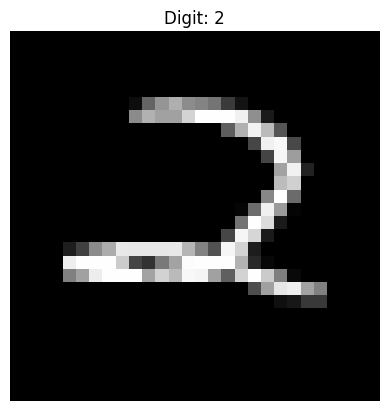

In [73]:
index = torch.randint(0, len(train_set), ())
image, label = train_set[index]

# TODO: understand the permute() here.
plt.imshow(image.permute((1, 2, 0)), cmap='gray')
plt.title(f'Digit: {label}')
plt.axis('off')
plt.show()

Since the task is binary classification, we will group the digits $\{0, 1, 2, 3, 4\}$ in class 0 and the digits $\{5, 6, 7, 8, 9\}$ in class 1.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch #0: Loss=6.798e-01
Epoch #1: Loss=6.470e-01
Epoch #2: Loss=6.024e-01


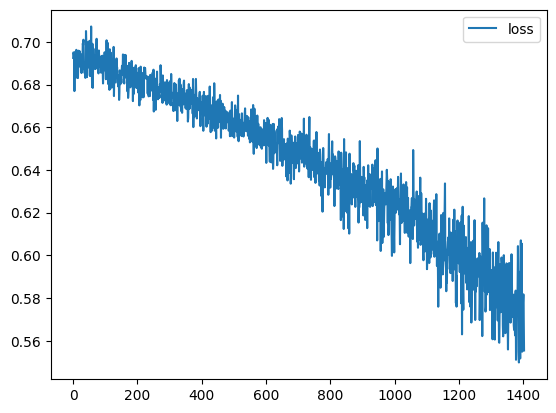

In [74]:
import torch.nn.functional as F


torch.manual_seed(0)
# TODO: understand the model here.
model = nn.Sequential(
    nn.Flatten(1),
    nn.Linear(28 * 28, 256),
    nn.ReLU(inplace=True),
    nn.Linear(256, 64),
    nn.ReLU(inplace=True),
    nn.Linear(64, 1),
    nn.Flatten(0),
)

# TODO: vvvvvvvvvvv
# it is recommended to use F.binary_cross_entropy_with_logits(x, y)
# over F.binary_cross_entropy(torch.sigmoid(x), y)
# Ans.: yes
# why?
# Ans.: because the former is more numerically stable and computationally efficient
# change it below
# def criterion(x, y):
#     x = torch.sigmoid(x)
#     y = (y >= 5).to(dtype=torch.float)
#     return F.binary_cross_entropy(x, y)

def criterion(x, y):
    y = (y >= 5).to(dtype=torch.float)
    return F.binary_cross_entropy_with_logits(x, y)
# ^^^^^^^^^^^^^^^^^

train_loader = DataLoader(
    train_set,
    batch_size=128,
    shuffle=True,
    num_workers=4,
    drop_last=True,
    pin_memory=False,
    collate_fn=None,
)

losses = gradient_descent(
    model,
    learning_rate=0.001,
    num_epochs=3,
    data_loader=train_loader,
    criterion=criterion,
)

plt.plot(losses, label='loss')
plt.legend()
plt.show()

Let's see how we are doing on the test set in terms of classificaiton accuracy.

In [75]:
test_set = datasets.MNIST(
    root_dir,
    train=False,
    download=True,
    transform=T.Compose([
        T.ToTensor(),
        T.Normalize([0.1307], [0.3081]),
    ]),
)

test_loader = DataLoader(
    test_set,
    batch_size=128,
    shuffle=False,
    num_workers=4,
    drop_last=False,
    pin_memory=False,
    collate_fn=None,
)

import torch.nn as nn
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = criterion

# train the model for 10 epochs
for epoch in range(10):
    # set the model to training mode
    model.train()

    # iterate over the training set
    correct_count = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels.float())

        # backward pass
        loss.backward()
        optimizer.step()

        # compute the accuracy
        prediction = outputs >= 0.5
        ground_truth = labels >= 5
        correct_count += (prediction == ground_truth).sum().item()
        total += len(labels)
    accuracy = correct_count / total
    print(f"Epoch {epoch+1}, training accuracy: {accuracy*100:.2f}%")

Epoch 1, training accuracy: 95.01%
Epoch 2, training accuracy: 97.82%
Epoch 3, training accuracy: 98.40%
Epoch 4, training accuracy: 98.77%
Epoch 5, training accuracy: 99.11%
Epoch 6, training accuracy: 99.25%
Epoch 7, training accuracy: 99.39%
Epoch 8, training accuracy: 99.46%
Epoch 9, training accuracy: 99.53%
Epoch 10, training accuracy: 99.54%


In [76]:
# evaluation mode
# compute the classification accuracy
total = 0
correct_count = 0
model.train(False)  # TODO: why? setting the model to evaluation mode, which disables some layers like dropout and batch normalization that are used during training but shouldn't be used during evaluation
with torch.no_grad():  # TODO: why? disables autograd and thus the computation of gradients, which can save memory and speed up computations during evaluation
    for images, labels in test_loader:
        # TODO: understand how the calculation is being done.
        prediction = model(images) >= 0.5
        ground_truth = labels >= 5
        correct_count += (prediction == ground_truth).sum().item()
        total += len(labels)
accuracy = correct_count / total
print(f'{accuracy * 100:.2f}% (random classifier gives you 50%)')

# TODO: change the previous cell and note your changes here
# Ans.: changes: added training loop
# the goal is to reach 95% accuracy on the training set
# Ans: 98.45

98.45% (random classifier gives you 50%)


## Task 2: Softmax and Cross-Entropy (1.5 points)

A slightly more difficult classification problem than binary classification is multi-class classification (each sample can is assigned only one of many class labels possibly greater than 2). In such case, the size of the output is set to be equal to the number of classes, where the class prediction is the dimension with the maximum value. If we apply a hard max operator on the output, we should get 1 at the maximum value and 0's everywhere else (a.k.a [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)). To get a probability as we did before, we apply a soft version of the max function (called [softmax](https://en.wikipedia.org/wiki/Softmax_function)), which normalizes the output values to sum to 1 and forces them to be in the range $[0, 1]$. With this setup, we can use the cross entropy criterion as our loss function. This is the most common setup for multi-class classification problems. It is only marginally modified for multi-label classification problems (one sample can be assigned more than one class), where a bed-of-nails is used as the target and the used criterion is the binary cross entropy loss. Regardless, we will only focus on the multi-class problem.

Epoch #0: Loss=1.723e+00
Epoch #1: Loss=5.312e-01
Epoch #2: Loss=3.694e-01
Epoch #3: Loss=3.105e-01
Epoch #4: Loss=2.749e-01
Epoch #5: Loss=2.470e-01
Epoch #6: Loss=2.237e-01
Epoch #7: Loss=2.038e-01
Epoch #8: Loss=1.869e-01
Epoch #9: Loss=1.721e-01


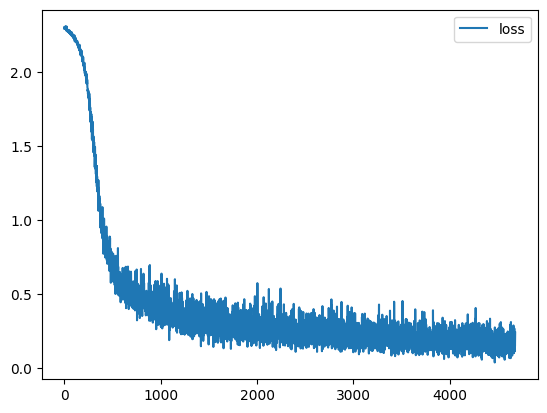

95.14% (random classifier gives you 10%)


In [77]:
# TODO: vvvvvvvvvvv
# do your magic here, the goal is 95% accuracy
# Ans.: 95.14%
# you can change the model (only using Flatten, Linear, and ReLU), the optimizer, the hyper-paremeters
torch.manual_seed(0)
model = nn.Sequential(
    nn.Flatten(1),
    nn.Linear(28 * 28, 256),
    nn.ReLU(inplace=True),
    nn.Linear(256, 100),
    nn.ReLU(inplace=True),
    nn.Linear(100, 64),
    nn.ReLU(inplace=True),
    nn.Linear(64, 10),
    # no need to add nn.Softmax() here
)

# this has softmax inside it already
criterion = nn.CrossEntropyLoss()

losses = gradient_descent(
    model,
    learning_rate=0.01,
    num_epochs=10,
    data_loader=train_loader,
    criterion=criterion,
)
# ^^^^^^^^^^^^^^^^^

plt.plot(losses, label='loss')
plt.legend()
plt.show()

# compute the classification accuracy
total = 0
correct_count = 0
model.train(False)
with torch.no_grad():
    for images, labels in test_loader:
        prediction = model(images).argmax(1)
        correct_count += (prediction == labels).sum().item()
        total += len(labels)
accuracy = correct_count / total
print(f'{accuracy * 100:.2f}% (random classifier gives you 10%)')

Our models are getting heavier and they started needing some hardware acceleration. It is time to update `gradient_descent()` and rewrite it to:

1. Start training on the GPU
1. Log the progress after every epoch (loss and classification accuracy)
1. Expect a validaiton data loader (inspect overfitting)
1. use a more sophisticated optimizer (e.g., Adam)
1. Put the model in training mode (some layers have different behavior between training and testing)
1. Disable unnecessarily computing gradients in evaluation mode

Advanced features that we will add in future projects.
1. Expect a learning rate scheduler (dynamically changing the learning rate)
1. Ability to save checkpoints as training progresses in case of failures
1. Ability to resume training from a saved checkpoint
1. Perform early stopping (in case of overfitting or diverging training)
1. Expect command line arguments from `argparse`

For the avid reader, check [this](http://bit.ly/dl_for_cv_05) out if you are interested in seeing an implementation of these features.

We will create a function that can be called in one of two modes; when `torch.is_grad_enabled()` is True and when it is not. The first mode is for training and the second is for validation. For now, we will use the testing dataset as our validation split (yeah, we are cheating a bit).

In [78]:
# TODO: vvvvvvvvvvv
# you should be able to explain all the introduced changes
# read: https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
# TODO: add lr_scheduler as an optional input and call its step()
def gradient_descent(model, loaders, optimizer, device, epochs, lr_scheduler=None):
    metrics = {'loss': [], 'accuracy': [], 'v_loss': [], 'v_accuracy': []}
    train = torch.is_grad_enabled()
    model.train(train)
    for epoch in range(epochs):  # one epoch
        count = avg_loss = avg_accuracy = 0
        for inputs, outputs in loaders[not train]:  # one iteration
            # move the inputs and outputs tensors to device
            inputs, outputs = inputs.to(device), outputs.to(device)
            logits = model(inputs)  # forward-pass
            loss = F.cross_entropy(logits, outputs)  # compute objective

            if train:
                optimizer.zero_grad()  # zero out the gradients
                loss.backward()  # compute the gradients (backward-pass)
                optimizer.step()  # take one step
                if lr_scheduler is not None:
                    lr_scheduler.step()  # update the learning rate

            # update the metrics
            count += len(outputs)
            avg_loss += loss.item()
            avg_accuracy += (logits.data.argmax(1) == outputs).sum().item()

        # accumulate the metrics
        avg_loss *= len(loaders[not train])
        avg_accuracy /= count
        metrics['loss'].append(avg_loss)
        metrics['accuracy'].append(avg_accuracy)

        if train:
            # perform a validation epoch if done training
            with torch.no_grad():
                # TODO: this function calls itself? explain
                v_metrics = gradient_descent(model, loaders, None, device, 1)
                metrics['v_loss'].append(v_metrics['loss'][0])
                metrics['v_accuracy'].append(v_metrics['accuracy'][0])

            # log the progress
            msg = '{}[loss={:.3e} @ accuracy={:.2f}%]'
            loss, accuracy = metrics['loss'][-1], metrics['accuracy'][-1]
            train_values = msg.format('Train', loss, accuracy * 100)
            loss, accuracy = metrics['v_loss'][-1], metrics['v_accuracy'][-1]
            val_values = msg.format('Val', loss, accuracy * 100)
            print(f'Epoch #{epoch}: {train_values} {val_values}')
    return metrics
# ^^^^^^^^^^^^^^^^^

In [79]:
def plot_metrics(metrics):
    figure, axes = plt.subplots(1, 2, figsize=(15, 5))

    epochs = range(len(metrics['loss']))
    axes[0].plot(epochs, metrics['loss'], marker='o', label='train')
    axes[0].plot(epochs, metrics['v_loss'], marker='o', label='valid')
    axes[0].set_title('Loss')
    axes[0].legend()
    axes[0].grid()

    axes[1].plot(epochs, metrics['accuracy'], marker='o', label='train')
    axes[1].plot(epochs, metrics['v_accuracy'], marker='o', label='valid')
    axes[1].set_title('Accuracy')
    axes[1].legend()
    axes[1].grid()

    plt.show(figure)
    best = max(metrics['v_accuracy']) * 100
    print(f'Best validation accuracy {best:.2f}%')

In [ ]:
# TODO: vvvvvvvvvvv
# do your magic here, the goal is 98.20% "validation" accuracy
# Ans.: 97.67
# learn more about regularization: https://stats.stackexchange.com/a/18765
# tricks like (dropout, weight decay, learning rate scheduling) might help
# see what others have tried https://stats.stackexchange.com/q/376312
torch.manual_seed(0)
dropout_prob = 0.5

model = nn.Sequential(
    nn.Flatten(1),
    nn.Linear(28 * 28, 256),
    nn.ReLU(inplace=True),
    nn.Dropout(dropout_prob),
    nn.Linear(256, 100),
    nn.ReLU(inplace=True),
    nn.Dropout(dropout_prob),
    nn.Linear(100, 64),
    nn.ReLU(inplace=True),
    nn.Dropout(dropout_prob),
    nn.Linear(64, 10),
)

device = torch.device('cuda:0')  # select which GPU (index 0)
loaders = (train_loader, test_loader)  # train must be before test
# move model to device before you initialize the optimizer
weight_decay = 0.001
optimizer = torch.optim.Adam(model.to(device).parameters(), weight_decay=weight_decay)
metrics = gradient_descent(model, loaders, optimizer, device, epochs=20)
plot_metrics(metrics)
# ^^^^^^^^^^^^^^^^^

## Task 3: Convolutional Neural Networks (1.5 points)

<table>
  <tbody>
    <tr>
      <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides.gif"></td>
      <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/arbitrary_padding_no_strides.gif"></td>
      <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/same_padding_no_strides.gif"></td>
      <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/full_padding_no_strides.gif"></td>
    </tr>
    <tr>
      <td>No padding, no strides</td>
      <td>Arbitrary padding, no strides</td>
      <td>Half padding, no strides</td>
      <td>Full padding, no strides</td>
    </tr>
    <tr>
      <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides.gif"></td>
      <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides.gif"></td>
      <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_odd.gif"></td>
      <td><h5><i><b>Source:</b> <a href="https://github.com/vdumoulin/conv_arithmetic">vdumoulin</a></i></h5></td>
    </tr>
    <tr>
      <td>No padding, strides</td>
      <td>Padding, strides</td>
      <td>Padding, strides (odd)</td>
      <td></td>
    </tr>
  </tbody>
</table>

Images have a nice 2D sturcture and adjacent pixels have some sort of uniformity. When we are working with fully connected networks, we lose a huge advantage. This is why we should leverage natural operations like 2D convolutions. In convolutional neural networks (CNNs), the image gets processed first with few convolutional layers the goal is to diminish the the spatial dimensions and focus on more hierarchically semantic features by expanding the channel dimension. Convolutional layers are usually followed by pooling layers to inforce this even further.


A batch of input images in PyTorch has this shape [BatchSize $\times$ Channels $\times$ Height $\times$ Width]. If they are gray-scale images, Channels = 1, and if they are RGB, Channels = 3. After a convolutional layer, they the spatial dimensions usually gets smaller or stay the same (depending on the padding, strides, kernel size, and dilation). Consult the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) for a concrete formula. [This tutorial](http://bit.ly/dl_for_cv_04) compares MLPs and CNNs.

Epoch #0: Train[loss=8.451e+04 @ accuracy=88.22%] Val[loss=7.538e+02 @ accuracy=96.41%]
Epoch #1: Train[loss=2.579e+04 @ accuracy=96.42%] Val[loss=5.226e+02 @ accuracy=97.28%]
Epoch #2: Train[loss=1.940e+04 @ accuracy=97.30%] Val[loss=3.932e+02 @ accuracy=98.05%]
Epoch #3: Train[loss=1.615e+04 @ accuracy=97.67%] Val[loss=3.669e+02 @ accuracy=98.04%]
Epoch #4: Train[loss=1.344e+04 @ accuracy=98.10%] Val[loss=4.054e+02 @ accuracy=97.69%]
Epoch #5: Train[loss=1.178e+04 @ accuracy=98.33%] Val[loss=3.358e+02 @ accuracy=98.33%]
Epoch #6: Train[loss=1.074e+04 @ accuracy=98.44%] Val[loss=3.080e+02 @ accuracy=98.26%]
Epoch #7: Train[loss=9.837e+03 @ accuracy=98.59%] Val[loss=2.935e+02 @ accuracy=98.47%]
Epoch #8: Train[loss=8.748e+03 @ accuracy=98.78%] Val[loss=2.699e+02 @ accuracy=98.53%]
Epoch #9: Train[loss=7.773e+03 @ accuracy=98.89%] Val[loss=3.056e+02 @ accuracy=98.35%]


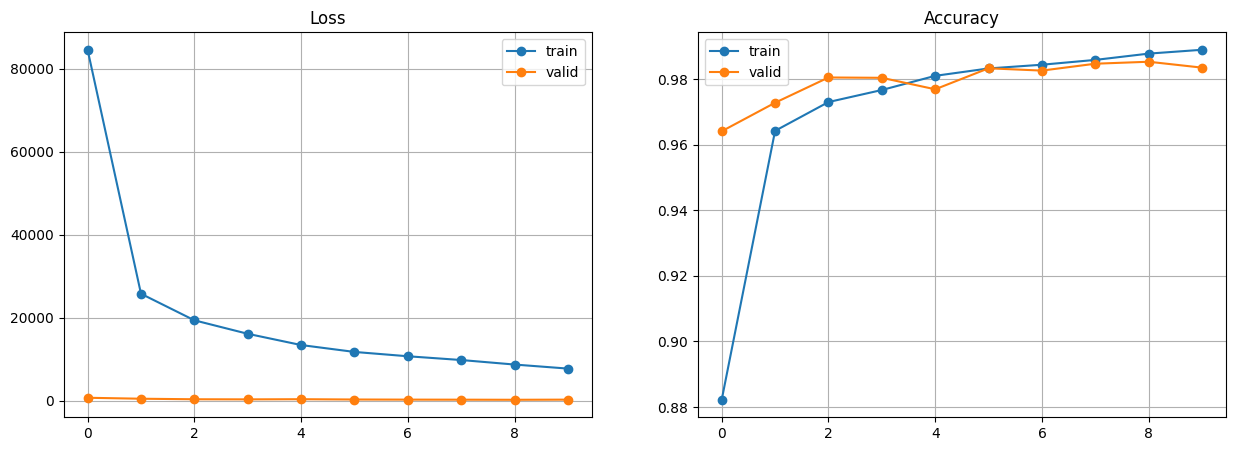

Best validation accuracy 98.53%


In [81]:
# TODO: vvvvvvvvvvv
# build a CNN of at least two nn.Conv2d() layers and one pooling layer
# followed by a flatten layer and one or more linear layers
# the goal is to achieve 99.30% validation accuracy
# see AlexNet https://pytorch.org/hub/pytorch_vision_alexnet/
# you should be able to discuss the the trends of in the plots
torch.manual_seed(0)
model = nn.Sequential(
    nn.Conv2d(1, 256, kernel_size=3, stride=2),
    nn.ReLU(True),
    nn.Conv2d(256, 32, kernel_size=3, stride=2),
    nn.ReLU(True),
    nn.AdaptiveAvgPool2d((3, 3)),
    nn.Flatten(),
    nn.Linear(32 * 3 * 3, 64),
    nn.ReLU(True),
    nn.Linear(64, 10),
)

device = torch.device('cuda:0')  # select which GPU (index 0)
loaders = (train_loader, test_loader)  # train must be before test
# move model to device before you initialize the optimizer
optimizer = torch.optim.Adam(model.to(device).parameters())
metrics = gradient_descent(model, loaders, optimizer, device, epochs=10)
plot_metrics(metrics)
# ^^^^^^^^^^^^^^^^^

Nice, let's move on to another image dataset. CIFAR10 is a $32 \times 32$ RGB images dataset that contains 10 classes. [Here](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) is a light official tutorial for training a CNN on CIFAR10. We need to differentiate between validation dataset (a subset of the training set for hyper-parameters tuning) and test sets (for reporting the model's performance).

In [82]:
from torch.utils.data import random_split


root_dir = Path(torch.hub.get_dir()) / f'datasets/CIFAR10'
normalize = T.Normalize(
    mean=(0.4915, 0.4823, 0.4468),
    std=(0.2470, 0.2435, 0.2616),
)
inv_normalize = T.Normalize(
    mean= [-m / s for m, s in zip(normalize.mean, normalize.std)],
    std= [1 / s for s in normalize.std]
)

train_set = datasets.CIFAR10(
    root_dir,
    train=True,
    download=True,
    transform=T.Compose([
        # TODO: vvvvvvvvvvv
        # read about http://wikipedia.org/wiki/Data_augmentation
        # take a look here https://pytorch.org/vision/stable/transforms.html
        # add some randomaization to improve the generalization
        # at least use 3 other transforms

        T.RandomHorizontalFlip(p=0.5),
        T.RandomCrop(size=32, padding=4),
        T.RandomRotation(degrees=15),

        T.ToTensor(),
        normalize,
        # ^^^^^^^^^^^^^^^^^
    ]),
)
test_set = datasets.CIFAR10(
    root_dir,
    train=False,
    download=True,
    transform=T.Compose([
        T.ToTensor(),
        normalize,
    ]),
)

print(train_set)
print(test_set)

# split the training set into 40K training and 10K validation
train_set, val_set = random_split(train_set, [40000, 10000])

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /root/.cache/torch/hub/datasets/CIFAR10
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomCrop(size=(32, 32), padding=4)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /root/.cache/torch/hub/datasets/CIFAR10
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))
           )


In [95]:
# TODO: vvvvvvvvvvv
# create data loaders for the three data splits
# make sure to have pin_memory=True (working on a GPU)

from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, pin_memory=True)
# ^^^^^^^^^^^^^^^^^

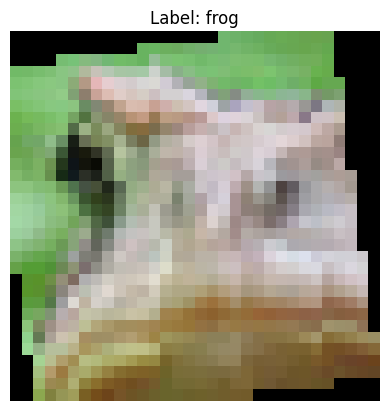

In [84]:
import torchvision.transforms.functional as TF


index = torch.randint(0, len(train_set), ())
image, label = train_set[index]

plt.imshow(TF.to_pil_image(inv_normalize(image)))
label = train_set.dataset.classes[label]
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

Epoch #0: Train[loss=2.465e+06 @ accuracy=42.04%] Val[loss=1.315e+05 @ accuracy=51.38%]
Epoch #1: Train[loss=1.944e+06 @ accuracy=55.08%] Val[loss=1.178e+05 @ accuracy=57.00%]
Epoch #2: Train[loss=1.739e+06 @ accuracy=60.05%] Val[loss=1.080e+05 @ accuracy=60.59%]
Epoch #3: Train[loss=1.579e+06 @ accuracy=64.14%] Val[loss=1.032e+05 @ accuracy=62.44%]
Epoch #4: Train[loss=1.488e+06 @ accuracy=66.37%] Val[loss=9.553e+04 @ accuracy=65.08%]
Epoch #5: Train[loss=1.416e+06 @ accuracy=67.96%] Val[loss=9.101e+04 @ accuracy=67.16%]
Epoch #6: Train[loss=1.353e+06 @ accuracy=69.44%] Val[loss=8.587e+04 @ accuracy=69.68%]
Epoch #7: Train[loss=1.304e+06 @ accuracy=70.65%] Val[loss=8.680e+04 @ accuracy=68.71%]
Epoch #8: Train[loss=1.265e+06 @ accuracy=71.65%] Val[loss=8.314e+04 @ accuracy=70.38%]
Epoch #9: Train[loss=1.219e+06 @ accuracy=72.44%] Val[loss=8.158e+04 @ accuracy=70.68%]


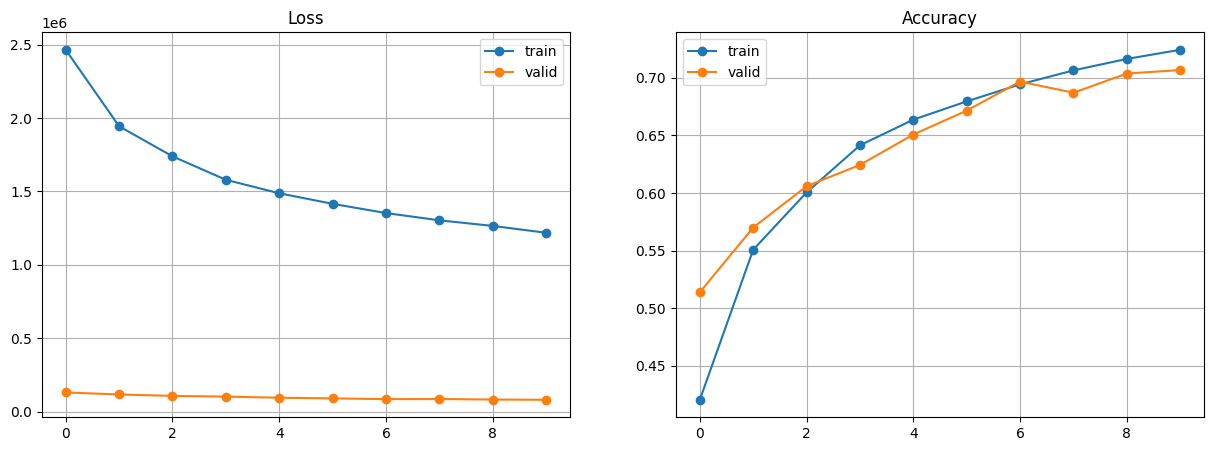

Best validation accuracy 70.68%


RuntimeError: ignored

In [96]:
# TODO: vvvvvvvvvvv
# build a CNN to achieve 70.00% "test" accuracy
# Ans.: 70.68%
torch.manual_seed(0)
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(32, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(128, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(128 * 4 * 4, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

device = torch.device('cuda:0')  # select which GPU (index 0)
loaders = (train_loader, val_loader)  # train must be before test
# move model to device before you initialize the optimizer
optimizer = torch.optim.Adam(model.to(device).parameters())
metrics = gradient_descent(model, loaders, optimizer, device, epochs=10)
plot_metrics(metrics)

with torch.no_grad():
    test_accuracy = gradient_descent(
        model, (None, test_loader), None, device, epochs=1)['accuracy'][0]
print(f'Test accuracy of the last model {test_accuracy * 100:.2f}%')
# ^^^^^^^^^^^^^^^^^